<a href="https://colab.research.google.com/github/eftekhar-hossain/MemoSen-LREC2022/blob/main/MemoSen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from bs4 import BeautifulSoup
### ML Librarires--------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
###-------------------------------------------
from keras.utils.vis_utils import plot_model
np.random.seed(42)
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
main_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/"
models_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/"
results_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Results/"
memes_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/"

CPU times: user 8.28 s, sys: 1.97 s, total: 10.3 s
Wall time: 18.7 s


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten, Reshape, Permute
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam
keras.backend.clear_session()

#Dataset Fetching (New)

In [ ]:
train_data = pd.read_excel(main_path+'train_new.xlsx')
valid_data = pd.read_excel(main_path+'valid_new.xlsx')
test_data = pd.read_excel(main_path+'test_new.xlsx')

print("Number of Training Data: ", len(train_data))
print("Number of validation Data: ", len(valid_data))
print("Number of Test Data: ", len(test_data))

Number of Training Data:  3536
Number of validation Data:  394
Number of Test Data:  438


In [ ]:
## Replace Names
train_data['enc_label'] = train_data['Label_Sentiment'].replace({'positive':0,'negative':1,'neutral':2})
valid_data['enc_label'] = valid_data['Label_Sentiment'].replace({'positive':0,'negative':1,'neutral':2})
test_data['enc_label'] = test_data['Label_Sentiment'].replace({'positive':0,'negative':1,'neutral':2})

#Dataset Fetching (old)

In [ ]:
train_data = pd.read_excel(main_path+'train.xlsx')
test_data = pd.read_excel(main_path+'test.xlsx')

print("Number of Training Data: ", len(train_data))
print("Number of Test Data: ", len(test_data))

Number of Training Data:  3495
Number of Test Data:  873


In [ ]:
train_data.columns

Index(['image_name', 'Captions', 'Label_Sentiment'], dtype='object')

In [ ]:
train_data['Label_Sentiment'].value_counts()

negative    2204
positive    1064
neutral      227
Name: Label_Sentiment, dtype: int64

In [ ]:
test_data['Label_Sentiment'].value_counts()

negative    524
positive    285
neutral      64
Name: Label_Sentiment, dtype: int64

In [ ]:
## Replace Names
train_data['enc_label'] = train_data['Label_Sentiment'].replace({'positive':0,'negative':1,'neutral':2})
test_data['enc_label'] = test_data['Label_Sentiment'].replace({'positive':0,'negative':1,'neutral':2})

##Dataset Distribution

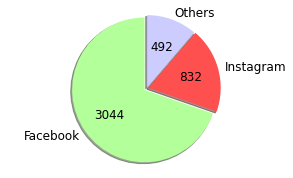

In [ ]:
import matplotlib.pyplot as plt
labels = 'Facebook', 'Instagram', 'Others'
fracs = np.array([3044, 832, 492])

def absolute_value(val):
    a  = int(np.round(val/100*fracs.sum()))
    return a

colors = ['#b3ff99','#ff5050','#ccccff']
fig1, ax1 = plt.subplots(figsize = (5,3))
explode = (0.04, 0.02, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax1.pie(fracs, explode=explode, labels=labels, colors=colors, autopct=absolute_value,
        shadow=True, startangle=90, textprops=dict(color="black",fontsize = 12,rotation = 0))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.)
plt.savefig(results_path+"pie1.png",dpi =400, bbox_inches='tight')
#plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["927 Funny Memes",
          "331 Motivation Memes",
          "891 Troll Memes",
          "1637 Offensive Memes",
          "622 Celebrity Memes",
          "230 Political Memes"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[1]+' Memes' for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)
colors = ['#b3ff99','#ffc499','#ccccff', '#fffc99','#99ffda','#ff99ec']
explode = (0.04, 0.02, 0.01,0,0,0)
wedges, texts, autotexts = ax.pie(data, explode = explode, autopct=lambda pct: func(pct, data), colors=colors, startangle=90,
                                  textprops=dict(color="black",fontsize = 10,rotation = 10))

ax.legend(wedges, ingredients,
          loc="center bottom",
          bbox_to_anchor=(1, 0, 0.5, 1))
#plt.setp(autotexts, size=8, Fontcolor = 'black' )

#ax.set_title("Matplotlib bakery: A pie")
plt.savefig(results_path+"pie2.png",dpi =400, bbox_inches='tight')
#plt.show()

## Display Some Data

In [ ]:
from matplotlib import image as im
for i in range(50):
  data = im.imread(memes_path+'3300 Memes/'+ train_data['image_name'][i],0)
  plt.figure()
  plt.axis('off')
  plt.imshow(data)
  plt.title(train_data['Label_Sentiment'][i])

'negative'

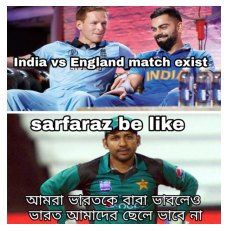

In [ ]:
n = 472
from matplotlib import image as im
data = im.imread(memes_path+'3300 Memes/'+ test_data['image_name'][n],0)
plt.figure()
plt.axis('off')
plt.imshow(data)
#plt.title('Human Damage')
plt.savefig(results_path+"472_negative.png",bbox_inches='tight')
test_data['Label_Sentiment'][n]

#Memes Fetching

In [ ]:
## collect image names from the folders
def create_img_array(img_dirct):
    all_imgs = []
    for root, j, files in os.walk(img_dirct):
        for file in files:
            file = root + '' + file
            all_imgs.append(file)
    return all_imgs

def create_img_path(DF, Col_name, img_dir):
    img_path = [img_dir + '' + name for name in DF[Col_name]]
    return img_path


In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 150*150*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = tf.keras.utils.load_img(path, target_size=(150,150))    
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array    
    img_data = tf.keras.utils.img_to_array(img)
    # Adding one more dimension to array    
    img_data = np.expand_dims(img_data, axis=0)
    #     
    img_data = preprocess_input(img_data)
    return(img_data)


In [ ]:
img_dir = memes_path+'3300 Memes/'
# Creating train, test and validation image path
train_img_path = create_img_path(train_data,'image_name', img_dir)
valid_img_path = create_img_path(valid_data,'image_name', img_dir)
test_img_path = create_img_path(test_data,'image_name', img_dir)

In [ ]:
# Create an array of training images
train_images = []
for i,m in enumerate(train_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  train_images.append(input_img[0])
  print(i)

# convert into numpy array
train_image = np.array(train_images)
print(train_image.shape)  

In [ ]:
import pickle as pkl
with open(main_path+'train_image_new.pkl','wb') as f:
    pkl.dump(train_image, f)

In [ ]:
# Create an array of test images
test_images = []
for i,m in enumerate(test_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  test_images.append(input_img[0])
  print(i)

# convert into numpy array
test_image = np.array(test_images)
print(test_image.shape)

In [ ]:
import pickle as pkl
with open(main_path+'test_image_new.pkl','wb') as f:
    pkl.dump(test_image, f)

In [ ]:
# Create an array of test images
valid_images = []
for i,m in enumerate(valid_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  valid_images.append(input_img[0])
  print(i)

# convert into numpy array
valid_image = np.array(valid_images)
print(valid_image.shape)

In [ ]:
import pickle as pkl
with open(main_path+'valid_image_new.pkl','wb') as f:
    pkl.dump(valid_image, f)

#Image Fetching (old)

In [ ]:
import pickle as pkl

with open(main_path+'train_image.pkl','rb') as f:
  train_image = pkl.load(f)
  print("Training Images:-- ",train_image.shape)
 
with open(main_path+'test_image.pkl','rb') as f:
  test_image = pkl.load(f)
  print("Test Images:-- ",test_image.shape)    

Training Images:--  (3495, 150, 150, 3)
Test Images:--  (873, 150, 150, 3)


#Image Fetching (New)

In [ ]:
import pickle as pkl

with open(main_path+'train_image_new.pkl','rb') as f:
  train_image = pkl.load(f)
  print("Training Images:-- ",train_image.shape)

with open(main_path+'valid_image_new.pkl','rb') as f:
  valid_image = pkl.load(f)
  print("Valid Images:-- ",valid_image.shape)   
 
with open(main_path+'test_image_new.pkl','rb') as f:
  test_image = pkl.load(f)
  print("Test Images:-- ",test_image.shape)    

Training Images:--  (3536, 150, 150, 3)
Valid Images:--  (394, 150, 150, 3)
Test Images:--  (438, 150, 150, 3)


#Captions Cleaning

In [ ]:
stp_path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Document Categorization/'
stp = open(stp_path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ') 
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # # Stopword 
  # result = text.split()
  # text = [word.strip() for word in result if word not in stp ]
  # text =" ".join(text)
  
  return text

In [ ]:
#Removing punctuations
train_data['cleaned'] = train_data['Captions'].apply(text_cleaning)
test_data['cleaned'] = test_data['Captions'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  print("Original Data:===\n",train_data.Captions[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 যদি জেমস বন্ড HSC পরীক্ষা দিতো আর পাশ করতো... আপনার নাম কি? বন্ড.....জেমস বন্ড আপনার রেসাল্ট কি? জিপির ৫....৩.৫! 
Cleaned Data:===
 যদি জেমস বন্ড hsc পরীক্ষা দিতো আর পাশ করতো আপনার নাম কি বন্ডজেমস বন্ড আপনার রেসাল্ট কি জিপির ৫৩৫
Original Data:===
 When a Sundori gives Ha Ha react on my meme : 
Cleaned Data:===
 when a sundori gives ha ha react on my meme
Original Data:===
 meyeta eto ratre baire chilo dekhe rape korsi     meyeta choto kapor porsilo tai rape korsi   আমি ধর্ষণ করিনি  'শয়তান আমাকে দিয়ে ধর্ষণ করিয়েছেঃ মসজিদের ইমাম  
Cleaned Data:===
 meyeta eto ratre baire chilo dekhe rape korsi meyeta choto kapor porsilo tai rape korsi আমি ধর্ষণ করিনি শয়তান আমাকে দিয়ে ধর্ষণ করিয়েছেঃ মসজিদের ইমাম
Original Data:===
 চাকিপ, চল! নেকেড নেকেড খেলি! বলদ, ওইটা নেকেড না! রেকেট! একই  তো কথা! 
Cleaned Data:===
 চাকিপ চল নেকেড নেকেড খেলি বলদ ওইটা নেকেড না রেকেট একই তো কথা
Original Data:===
 গালফ্রেন্ডঃ বাবু আজকে বাড়িতে কেও নেই... শুধু আমি একা   বয়ফ্রেন

#One Hot Encoding

In [ ]:
encoder=OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['Label_Sentiment']]))

encoded_labels.columns = encoder.get_feature_names(['Label_Sentiment'])

train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data = train_data.rename(columns={'Label_Sentiment_positive':'positive', 
                                        'Label_Sentiment_negative':'negative',
                                        'Label_Sentiment_neutral':'neutral'})

In [ ]:
train_data

#Dataset Statistics

In [ ]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())


lables = ['positive','negative','neutral']
# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0)+1
      # sort the dictionary of word list  
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum Caption length: {}".format(max(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Minimum Caption length: {}".format(min(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))
    

In [ ]:
dataset_statistics(train_data)


Class Name:--> positive 
Number of Words:16864
Number of Unique Words:5745
Maximum Caption length: 106
Minimum Caption length: 1
Average Words in texts: 15.849624060150376

Most Frequent Words:

না	313
আমি	219
কি	187
আমার	154
আর	145
তো	119
করে	109
যখন	86
তুমি	83
হয়	82

Class Name:--> negative 
Number of Words:29443
Number of Unique Words:8738
Maximum Caption length: 63
Minimum Caption length: 1
Average Words in texts: 13.358892921960072

Most Frequent Words:

না	437
আমি	334
আমার	304
যখন	266
কি	223
করে	212
আর	191
তো	159
you	156
পর	139

Class Name:--> neutral 
Number of Words:3074
Number of Unique Words:1702
Maximum Caption length: 30
Minimum Caption length: 2
Average Words in texts: 13.541850220264317

Most Frequent Words:

আমি	51
না	50
যখন	47
পর	34
আমার	26
এর	25
আর	24
কি	22
আমিঃ	20
me	19


In [ ]:
### Plot a Distribution
def sentence_length_per_class(dataset,set_name):
  label = dataset[['positive','negative','neutral']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l    

  labelsplt = ['positive','negative','neutral' ]
  color = ['blue','red','green']    
  bins = [1,5,10,15,20,25,30,35,40,45,50,55,60]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 40, 0, 700])
  plt.xlabel('Length of the Caption')
  plt.ylabel('Number of Captions ') 
  plt.legend()
  plt.savefig(results_path+'length-dist.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()
  

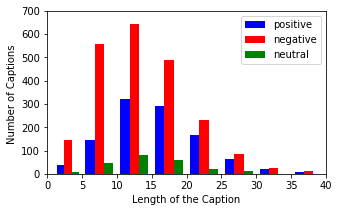

In [ ]:
sentence_length_per_class(train_data,'Training')

##Jacard Similarity

In [ ]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())


lables = ['positive','negative','neutral']
# Count number of unique words in each set

final_list = []

for l in lables:
  label_wise_word_list = []
  word_list = [word.strip() for t in list(train_data[train_data[l]==1].cleaned) for word in t.strip().split()]
  counts = dict()
  for word in word_list:
      counts[word] = counts.get(word, 0)+1
      # sort the dictionary of word list  
  ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
  print(f"\nClass Name:--> {l} ") 
  
  for k,v in ordered[:400]:
    label_wise_word_list.append(k)
  
  final_list.append(label_wise_word_list)
    


Class Name:--> positive 

Class Name:--> negative 

Class Name:--> neutral 


In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
for i in range(len(final_list)):
  for j in range(i+1,3):
    print(i,"-->",j ,jaccard_similarity(final_list[i],final_list[j]))

0 --> 1 0.3559322033898305
0 --> 2 0.21396054628224584
1 --> 2 0.22887864823348694


##Scatter Plot

In [ ]:
!pip install texthero

In [ ]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data['tfidf'] = (
    hero.tfidf(train_data['cleaned'], max_features=2000)
)
train_data[["tfidf", "Label_Sentiment"]].head(2)

In [ ]:
train_data['pca'] = hero.pca(train_data['tfidf'])
hero.scatterplot(
    train_data, 
    col='pca', 
    color='Label_Sentiment', 
    title="PCA Multimodal Sentiment"
)

In [ ]:
train_data

#Evaluation Metrics

In [ ]:
'''Evaluation Parameters'''

def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['positive','negative','neutral']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

#Callbacks

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_check(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint] 

  return callback_list

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_data['enc_label']),
                                        y = train_data['enc_label']                                                   
                                    )
class_weights = dict(zip(np.unique(train_data['enc_label']), class_weights))
class_weights

{0: 1.0949248120300752, 1: 0.528584392014519, 2: 5.13215859030837}

In [ ]:
class_weights = {0:1.528584392014519, 1:0.528584392014519, 2: 2.13215859030837}
class_weights

{0: 1.528584392014519, 1: 0.528584392014519, 2: 2.13215859030837}

#Visual Modality

In [ ]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight 
  '''
  base_model = pretrained_model
  base_model.trainable = False
  y = base_model.output
  pool = GlobalAveragePooling2D()(y)
  #flatten = Flatten()(pool)
  output = Dense(3, activation='softmax')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)
 
  return img_model

In [ ]:
xception = Xception(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

##Xception

In [ ]:
xcept_model = visual_models(xception)
xcept_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Adam(), 
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
xcept_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=40, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('xception')
              )

In [ ]:
 # Prediction 
model = load_model(models_path+"xception.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[ 87 189   9]
 [ 59 444  21]
 [  7  51   6]]
              precision    recall  f1-score   support

    positive       0.57      0.31      0.40       285
    negative       0.65      0.85      0.74       524
     neutral       0.17      0.09      0.12        64

    accuracy                           0.62       873
   macro avg       0.46      0.42      0.42       873
weighted avg       0.59      0.62      0.58       873

Accuracy :  0.6151202749140894
Precison :  0.5874751902328424
Recall :  0.6151202749140894
F1 :  0.5797150413085043


##VGG19

In [ ]:
vgg19_model = visual_models(vgg19)
vgg19_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Adam(), 
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
vgg19_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=40, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg19')
              )

In [ ]:
 # Prediction 
model = load_model(models_path+"vgg19.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[141 115  29]
 [113 318  93]
 [ 18  31  15]]
              precision    recall  f1-score   support

    positive       0.52      0.49      0.51       285
    negative       0.69      0.61      0.64       524
     neutral       0.11      0.23      0.15        64

    accuracy                           0.54       873
   macro avg       0.44      0.45      0.43       873
weighted avg       0.59      0.54      0.56       873

Accuracy :  0.5429553264604811
Precison :  0.5886219467508369
Recall :  0.5429553264604811
F1 :  0.5626057542986971


##VGG16

In [ ]:
keras.backend.clear_session()
vgg16_model = visual_models(vgg16)
vgg16_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=RMSprop(), 
                    metrics = ["accuracy"])

In [ ]:
vgg16_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=20, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg16')
              )

In [ ]:
 # Prediction 
model = load_model(models_path+"vgg16.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[ 83 173  29]
 [ 57 402  65]
 [  9  42  13]]
              precision    recall  f1-score   support

    positive       0.56      0.29      0.38       285
    negative       0.65      0.77      0.70       524
     neutral       0.12      0.20      0.15        64

    accuracy                           0.57       873
   macro avg       0.44      0.42      0.41       873
weighted avg       0.58      0.57      0.56       873

Accuracy :  0.570446735395189
Precison :  0.5818337884623194
Recall :  0.570446735395189
F1 :  0.5589624467359149


##ResNet50

In [ ]:
keras.backend.clear_session()
resnet_model = visual_models(resnet)
resnet_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=RMSprop(), 
                    metrics = ["accuracy"])

In [ ]:
resnet_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=20, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('resnet-1')
              )

In [ ]:
 # Prediction 
model = load_model(models_path+"resnet-1.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[106 172   7]
 [ 67 436  21]
 [  7  51   6]]
              precision    recall  f1-score   support

    positive       0.59      0.37      0.46       285
    negative       0.66      0.83      0.74       524
     neutral       0.18      0.09      0.12        64

    accuracy                           0.63       873
   macro avg       0.48      0.43      0.44       873
weighted avg       0.60      0.63      0.60       873

Accuracy :  0.6277205040091638
Precison :  0.602302753479583
Recall :  0.6277205040091638
F1 :  0.6002489782826507


##DenseNet

In [ ]:
keras.backend.clear_session()
densenet_model = visual_models(densenet)
densenet_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Adam(), 
                    metrics = ["accuracy"])

In [ ]:
densenet_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=20, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('densenet')
              )

In [ ]:
 # Prediction 
model = load_model(models_path+"densenet.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

##Visual Models Performance

In [ ]:
visual_models = ['xception','vgg19','vgg16','resnet','densenet']
visual_model_names = ['Xception','Vgg19','Vgg16','Resnet','Densenet']

def visual_models_accuracy(saved_model): 
  my_dict = {}
  # Prediction 
  model = load_model(models_path+f"{saved_model}.h5")
  pred = model.predict(test_image)
  y_pred = np.argmax(pred,axis=1)

  y_true = test_data['enc_label']

  my_dict['Accuracy'] = accuracy_score(y_true, y_pred)*100
  my_dict['Precision'] = precision_score(y_true, y_pred,average = 'weighted')*100
  my_dict['Recall'] = recall_score(y_true, y_pred,average = 'weighted')*100 
  my_dict['F1 Score'] = f1_score(y_true, y_pred,average = 'weighted')*100 
  return my_dict

In [ ]:
accuracy = {f'{visual_model_names[i]}':visual_models_accuracy(model) for i,model in enumerate(visual_models)}
# Save the performance parameter into json file
with open(results_path+'visual_models_performance.json', 'w') as f:
    json.dump(accuracy, f)

In [ ]:
# Load the json file
metrics = json.load(open(results_path+'visual_models_performance.json'))
acc_list = []
pr_list = []
re_list = []
f1_list = []
for i in metrics.keys():
  acc_list.append(round(metrics[i]['Accuracy'],2))
  pr_list.append(round(metrics[i]['Precision'],2))
  re_list.append(round(metrics[i]['Recall'],2))
  f1_list.append(round(metrics[i]['F1 Score'],2))

print (color.BOLD+f"=======  Visual Models Performance on Test Data  =============\n"+color.END)
# Create a dataframe
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['Xception','Vgg19','Vgg16','Resnet','Densenet'])
performance_matrix

=======  Visual Models Performance on Test Data  =============



Accuracy  Precision  Recall  F1 Score
Xception     61.51      58.75   61.51     57.97
Vgg19        54.30      58.86   54.30     56.26
Vgg16        57.04      58.18   57.04     55.90
Resnet       65.86      64.99   65.86     64.19
Densenet     60.94      58.54   60.94     59.43

In [ ]:
# Best Visual Model (ResNet)
model = load_model(models_path+"resnet-1.h5")
pred = model.predict(test_image)
y_pred_vm = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred_vm)

[[106 172   7]
 [ 67 436  21]
 [  7  51   6]]
              precision    recall  f1-score   support

    positive       0.59      0.37      0.46       285
    negative       0.66      0.83      0.74       524
     neutral       0.18      0.09      0.12        64

    accuracy                           0.63       873
   macro avg       0.48      0.43      0.44       873
weighted avg       0.60      0.63      0.60       873

Accuracy :  0.6277205040091638
Precison :  0.602302753479583
Recall :  0.6277205040091638
F1 :  0.6002489782826507


#Textual Modality

##Machine Learning 

In [ ]:
# Text Feature Extraction using TF-IDF
cv = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
train_X = cv.fit_transform(train_data.Captions)

# Test data
test_X = cv.transform(test_data.Captions)

print("\nShape of TF-IDF Corpus =====>",train_X.shape)
print("\nShape of TF-IDF Corpus =====>",test_X.shape)


Shape of TF-IDF Corpus =====> (3495, 14251)

Shape of TF-IDF Corpus =====> (873, 14251)


In [ ]:
                  #=================================
                  #########  Define models  #########
                  #==================================
lr_model = LogisticRegression(random_state = 123)
#dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#rf_model = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
mnb_model = MultinomialNB(alpha=0.05)
svm_model = SVC(kernel = 'linear',probability=True,random_state = 0)
model_names = ['Logistic Regression','Naive Bayes','SVM']
ml_models = [lr_model,mnb_model,svm_model]

               #============================================
               ####### Model Evaluation Function ############
               #=============================================

def model_accuracy(model,X_train,X_test,y_train,y_test):
  my_dict = {}
  model.fit(X_train,y_train)
  # Prediction
  pred_y = model.predict(X_test)
  my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),3)*100 
  my_dict['Precision'] = round(precision_score(y_test, pred_y,average='weighted'),3)*100 
  my_dict['Recall'] = round(recall_score(y_test, pred_y,average='weighted'),3)*100 
  my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='weighted'),3)*100 
  return my_dict

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_accuracy(model,train_X,test_X,train_data['enc_label'],test_data['enc_label']) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open(results_path+'ml_model_performance.json', 'w') as f:
    json.dump(accuracy, f)


In [ ]:
# Load the json file
accuracy = json.load(open(results_path+'ml_model_performance.json'))
acc_list = []
pr_list = []
re_list = []
f1_list = []
for i in accuracy.keys():
  acc_list.append(accuracy[i]['Accuracy'])
  pr_list.append(accuracy[i]['Precision'])
  re_list.append(accuracy[i]['Recall'])
  f1_list.append(accuracy[i]['F1 Score'])

# Create a dataframe
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','MNB','SVM'])
performance_matrix

Accuracy  Precision  Recall  F1 Score
LR       66.3       61.7    66.3      60.8
MNB      66.3       64.3    66.3      62.8
SVM      65.3       67.0    65.3      60.8

##Deep Learning 

In [ ]:
''' Tokenizer '''

def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):
  
  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['Captions'])  
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1
  
  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['Captions'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)

  # valid Sequences
  # valid_sequences = tokenizer.texts_to_sequences(valid_data['Captions'])
  # valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['Captions'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
 

  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")  
  print(train_data.Captions[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num]) 

  return train_pad_sequences,  test_pad_sequences, vocab_size, word_index

  # return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 60
sample_text_num = 10

## Call Tokenizer
# train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
#                                                                       vocabulary,max_len,sample_text_num) 

train_pad_sequences,  test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num) 

print("Number of Train Sequences :" ,train_pad_sequences.shape)
# print("Number of Test Sequences :" ,valid_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)


			====== Encoded Sequences ====== 

আপা কি করেন? রান্না করি ও আচ্ছা, বাসায় কুকুর আছে? না! কেন? তাইলে খাবার খাবে কে? তার বাসার সামনে আরো তিনটা বালুর ট্রাক দাও 
 [1247, 5, 479, 634, 77, 49, 246, 144, 1070, 37, 2, 18, 277, 686, 1818, 45, 83, 247, 113, 687, 1819, 836, 837, 145]

			====== Paded Sequences ======
 
 [1247    5  479  634   77   49  246  144 1070   37    2   18  277  686
 1818   45   83  247  113  687 1819  836  837  145    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
Number of Train Sequences : (3495, 60)
Number of Test Sequences : (873, 60)
Vocabulary Size:  12232


###LSTM

In [ ]:
###### BiLSTM Model #######
bi_text_inputs = Input(shape=(max_len,))
bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)

In [ ]:
keras.backend.clear_session()
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

  
bilstm_model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    class_weight = weight,
    callbacks = callbacks_check('lstm'))

In [ ]:
 # Prediction 
model = load_model(models_path+"lstm.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[127 142  16]
 [104 393  27]
 [ 18  39   7]]
              precision    recall  f1-score   support

    positive       0.51      0.45      0.48       285
    negative       0.68      0.75      0.72       524
     neutral       0.14      0.11      0.12        64

    accuracy                           0.60       873
   macro avg       0.44      0.43      0.44       873
weighted avg       0.59      0.60      0.59       873

Accuracy :  0.6036655211912944
Precison :  0.5877296635805047
Recall :  0.6036655211912944
F1 :  0.5939579289945338


###CNN

In [ ]:
### CNN
cnn_text_inputs = Input(shape=(max_len,))
cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

cnn_flat = Flatten()(cnn_pool1)
cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

  
cnn_model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    class_weight = weight,
    callbacks = callbacks_check('cnn'))

Epoch 1/20
99/99 [==============================] - 2s 15ms/step - loss: 1.1035 - accuracy: 0.3374 - val_loss: 1.0878 - val_accuracy: 0.4943

Epoch 00001: val_accuracy improved from -inf to 0.49429, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/cnn.h5
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.9998 - accuracy: 0.5758 - val_loss: 1.0222 - val_accuracy: 0.4771

Epoch 00002: val_accuracy did not improve from 0.49429
Epoch 3/20
99/99 [==============================] - 1s 7ms/step - loss: 0.4619 - accuracy: 0.8610 - val_loss: 0.9686 - val_accuracy: 0.6143

Epoch 00003: val_accuracy improved from 0.49429 to 0.61429, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/cnn.h5
Epoch 4/20
99/99 [==============================] - 1s 7ms/step - loss: 0.0752 - accuracy: 0.9835 - val_loss: 1.0507 - val_accuracy: 0.6571

Reach

In [ ]:
 # Prediction 
model = load_model(models_path+"cnn.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[105 147  33]
 [ 69 407  48]
 [  9  43  12]]
              precision    recall  f1-score   support

    positive       0.57      0.37      0.45       285
    negative       0.68      0.78      0.73       524
     neutral       0.13      0.19      0.15        64

    accuracy                           0.60       873
   macro avg       0.46      0.44      0.44       873
weighted avg       0.61      0.60      0.59       873

Accuracy :  0.6002290950744559
Precison :  0.6059742101956861
Recall :  0.6002290950744559
F1 :  0.5935441473105277


###LSTM-CNN

In [ ]:
##### LSTM-CNN Model ####
lc_text_inputs = Input(shape=(max_len,))
lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

  
cnn_lstm_model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    class_weight = weight,
    callbacks = callbacks_check('lstm-cnn'))

Epoch 1/20
99/99 [==============================] - 7s 33ms/step - loss: 1.1041 - accuracy: 0.3622 - val_loss: 1.1458 - val_accuracy: 0.2171

Epoch 00001: val_accuracy improved from -inf to 0.21714, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/lstm-cnn.h5
Epoch 2/20
99/99 [==============================] - 2s 24ms/step - loss: 0.9127 - accuracy: 0.4973 - val_loss: 0.8935 - val_accuracy: 0.6429

Epoch 00002: val_accuracy improved from 0.21714 to 0.64286, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/lstm-cnn.h5
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 0.3524 - accuracy: 0.8604 - val_loss: 1.2014 - val_accuracy: 0.5743

Epoch 00003: val_accuracy did not improve from 0.64286
Epoch 4/20
99/99 [==============================] - 2s 24ms/step - loss: 0.0641 - accuracy: 0.9723 - val_loss: 1.5215 - val_accuracy: 

In [ ]:
 # Prediction 
model = load_model(models_path+"lstm-cnn.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[121 108  56]
 [ 86 353  85]
 [ 17  37  10]]
              precision    recall  f1-score   support

    positive       0.54      0.42      0.48       285
    negative       0.71      0.67      0.69       524
     neutral       0.07      0.16      0.09        64

    accuracy                           0.55       873
   macro avg       0.44      0.42      0.42       873
weighted avg       0.61      0.55      0.58       873

Accuracy :  0.5544100801832761
Precison :  0.6066655467682375
Recall :  0.5544100801832761
F1 :  0.5766722808920274


##Transformers

In [ ]:
!pip install transformers

In [ ]:
############################## Sentence Encoding for Transformers 

def bert_encode(data,maximum_length,tokenizer) :
  input_ids = []
  attention_masks = []
  

  for i in range(len(data.cleaned)):
      encoded = tokenizer.encode_plus(
        
        data.cleaned[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,
        
      )
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  #output = Dense(32,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  output = Dense(3,activation='softmax')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

###Bangla-BERT

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data,40,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data,40,tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('sagorsarker/bangla-bert-base')

In [ ]:
### Checkpoint
filepath = models_path + 'bangla-bert-1.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model,40)
model.compile(Adam(lr=3e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_split = 0.1, 
                    epochs=6,
                    batch_size=16,
                    class_weight = weight,
                    callbacks = [checkpoint],
          )

In [ ]:
model2 = create_model(bert_model,40)
model2.load_weights(models_path+"bangla-bert-1.h5")
pred = model2.predict([test_input_ids,test_attention_masks])
y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[118 139  28]
 [ 68 394  62]
 [  8  40  16]]
              precision    recall  f1-score   support

    positive       0.61      0.41      0.49       285
    negative       0.69      0.75      0.72       524
     neutral       0.15      0.25      0.19        64

    accuracy                           0.60       873
   macro avg       0.48      0.47      0.47       873
weighted avg       0.62      0.60      0.61       873

Accuracy :  0.6048109965635738
Precison :  0.6223574434653725
Recall :  0.6048109965635738
F1 :  0.6058026222799656


###Muril

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("google/muril-base-cased")

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data,40,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data,40,tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained("google/muril-base-cased")

Downloading:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Some layers from the model checkpoint at google/muril-base-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
### Checkpoint
filepath = models_path + 'muril.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model,40)
model.compile(Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_split = 0.1, 
                    epochs=7,
                    batch_size=16,
                    # class_weight = weight,
                    callbacks = [checkpoint],
          )

In [ ]:
model2 = create_model(bert_model,40)
model2.load_weights(models_path+"muril.h5")
pred = model2.predict([test_input_ids,test_attention_masks])
y_pred_muril = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred_muril)

[[152 113  20]
 [101 403  20]
 [ 21  39   4]]
              precision    recall  f1-score   support

    positive       0.55      0.53      0.54       285
    negative       0.73      0.77      0.75       524
     neutral       0.09      0.06      0.07        64

    accuracy                           0.64       873
   macro avg       0.46      0.45      0.45       873
weighted avg       0.62      0.64      0.63       873

Accuracy :  0.6403207331042382
Precison :  0.6236087762763962
Recall :  0.6403207331042382
F1 :  0.6313327410583052


###XLM-R

In [ ]:
!pip install sentencepiece

In [ ]:
from transformers import XLMRobertaTokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data,40,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data,40,tokenizer)

In [ ]:
from transformers import TFXLMRobertaModel
xlm_model = TFXLMRobertaModel.from_pretrained("jplu/tf-xlm-roberta-base")

In [ ]:
### Checkpoint
filepath = models_path + 'xlm-r.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(xlm_model,40)
model.compile(Adam(learning_rate=1e-5,epsilon=1e-08, clipnorm=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_split = 0.1, 
                    epochs=4,
                    batch_size=16,
                    class_weight = weight,
                    callbacks = [checkpoint],
          )

In [ ]:
model2 = create_model(xlm_model,40)
model2.load_weights(models_path+"xlm-r.h5")
pred = model2.predict([test_input_ids,test_attention_masks])
y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[  0 285   0]
 [  0 524   0]
 [  0  64   0]]
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       285
    negative       0.60      1.00      0.75       524
     neutral       0.00      0.00      0.00        64

    accuracy                           0.60       873
   macro avg       0.20      0.33      0.25       873
weighted avg       0.36      0.60      0.45       873

Accuracy :  0.6002290950744559
Precison :  0.3602749665739002
Recall :  0.6002290950744559
F1 :  0.4502792352455474


#Multimodal Models (Late Fusion)

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight 
  '''
  ## ResNet50
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  resnet_model = resnet
  resnet_model.trainable = False
  resnet_y = resnet_model.output
  resnet_pool = GlobalAveragePooling2D()(resnet_y)
  resnet_output = Dense(3, activation='softmax')(resnet_pool)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet_model.input, outputs=resnet_output)

  ## DenseNet
  densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  densenet_model = densenet
  densenet_model.trainable = False
  densenet_y = densenet_model.output
  densenet_pool = GlobalAveragePooling2D()(densenet_y)
  densenet_output = Dense(3, activation='softmax')(densenet_pool)
  # this is the model we will train
  densenet_img_model = Model(inputs=densenet_model.input, outputs=densenet_output)

  image_models = [resnet_img_model,densenet_img_model] 
 
  return image_models


def textual_models():
  
  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]
 
  return dl_textual_models  

In [ ]:
visual_model_name = ['ResNet','DenseNet']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:

for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([visual_models_lsit[0].output, textual_model.output])
  final_dense = Dense(4, activation="relu")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  out = Dense(3,activation='softmax')(final_dense)
  com_model = Model(inputs = [visual_models_lsit[0].input, textual_model.input], outputs=out)
  
  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['enc_label'],
                      validation_split = 0.1, 
                      class_weight = weight,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')         
            )



Model Name:=====>
 ResNet_LSTM_late
Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 1.0878 - accuracy: 0.5469
Epoch 00001: val_accuracy improved from -inf to 0.47429, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_LSTM_late.h5
99/99 [==============================] - 85s 178ms/step - loss: 1.0878 - accuracy: 0.5469 - val_loss: 1.0562 - val_accuracy: 0.4743
Epoch 2/20
99/99 [==============================] - ETA: 0s - loss: 1.0437 - accuracy: 0.6734
Epoch 00002: val_accuracy improved from 0.47429 to 0.58000, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_LSTM_late.h5
99/99 [==============================] - 16s 164ms/step - loss: 1.0437 - accuracy: 0.6734 - val_loss: 0.9852 - val_accuracy: 0.5800
Epoch 3/20
99/99 [==============================] - ETA: 0s - loss: 0.9751 - accuracy: 0.7135
Epoch 00003: val

## Classification Report

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    model = load_model(models_path+ vm+'_'+tm+'_late'+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['enc_label'], y_pred)

Model name ===>  ResNet_LSTM
[[186  78  21]
 [129 357  38]
 [ 17  39   8]]
              precision    recall  f1-score   support

    positive       0.56      0.65      0.60       285
    negative       0.75      0.68      0.72       524
     neutral       0.12      0.12      0.12        64

    accuracy                           0.63       873
   macro avg       0.48      0.49      0.48       873
weighted avg       0.64      0.63      0.64       873

Accuracy :  0.6311569301260023
Precison :  0.6437212985013432
Recall :  0.6311569301260023
F1 :  0.635205049140606
Model name ===>  ResNet_CNN
[[179  79  27]
 [101 353  70]
 [ 11  37  16]]
              precision    recall  f1-score   support

    positive       0.62      0.63      0.62       285
    negative       0.75      0.67      0.71       524
     neutral       0.14      0.25      0.18        64

    accuracy                           0.63       873
   macro avg       0.50      0.52      0.50       873
weighted avg       0.66      

In [ ]:
#Best Multimodal Model
model = load_model(models_path+ "ResNet_CNN_late.h5")
pred = model.predict([test_image,test_pad_sequences])
y_pred_mm = np.argmax(pred,axis=1)
print_metrices(test_data['enc_label'], y_pred_mm)

[[179  79  27]
 [101 353  70]
 [ 11  37  16]]
              precision    recall  f1-score   support

    positive       0.62      0.63      0.62       285
    negative       0.75      0.67      0.71       524
     neutral       0.14      0.25      0.18        64

    accuracy                           0.63       873
   macro avg       0.50      0.52      0.50       873
weighted avg       0.66      0.63      0.64       873

Accuracy :  0.6277205040091638
Precison :  0.6629642769064275
Recall :  0.6277205040091638
F1 :  0.6429071032953977


#Multimodal Models with Transformers

##Bangla Bert with Visual Models(Late Fusion)

In [ ]:
visual_model_name = ['ResNet','DenseNet']
visual_models_lsit = visual_models()

# Distillbert model
text_model = create_model(bert_model,40)

In [ ]:
def model_checkpoint(model_name):
  ### Checkpoint
  filepath = models_path + f'{model_name}.h5'
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )
  
  return checkpoint


In [ ]:
y = np.array(train_data['enc_label'],dtype = 'int32')

In [ ]:
con_layer = keras.layers.concatenate([visual_models_lsit[0].output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
out = Dense(3,activation='softmax')(final_dense)
com_model = Model(inputs = [visual_models_lsit[0].input, text_model.input], outputs=out)
## Compiling 
keras.backend.clear_session()  
com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 3e-5), metrics = ["accuracy"])
com_model.fit([train_image,train_input_ids,train_attention_masks],
                    y,
                    validation_split = 0.1, 
                    class_weight = weight,
                    epochs=4,
                    batch_size=16,
                    callbacks = model_checkpoint(visual_model_name[0] +'_muril'))


Epoch 1/4
197/197 [==============================] - ETA: 0s - loss: 1.1053 - accuracy: 0.3987
Epoch 00001: val_accuracy improved from -inf to 0.30857, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_muril.h5
197/197 [==============================] - 188s 573ms/step - loss: 1.1053 - accuracy: 0.3987 - val_loss: 1.0814 - val_accuracy: 0.3086
Epoch 2/4
197/197 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.4006
Epoch 00002: val_accuracy did not improve from 0.30857
197/197 [==============================] - 90s 455ms/step - loss: 1.1052 - accuracy: 0.4006 - val_loss: 1.0814 - val_accuracy: 0.3057
Epoch 3/4
197/197 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.4016
Epoch 00003: val_accuracy did not improve from 0.30857
197/197 [==============================] - 89s 453ms/step - loss: 1.1052 - accuracy: 0.4016 - val_loss: 1.0814 - val_accuracy: 0.3057
Epoch 4

In [ ]:
con_layer = keras.layers.concatenate([visual_models_lsit[0].output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
#dropout = Dropout(0.01)(final_dense)
out = Dense(3,activation='softmax')(final_dense)
com_model = Model(inputs = [visual_models_lsit[0].input, text_model.input], outputs=out)

com_model.load_weights(models_path+"ResNet_muril.h5")
pred = com_model.predict([test_image,[test_input_ids,test_attention_masks]])
y_pred = np.argmax(pred,axis=1)
print_metrices(np.array(test_data['enc_label']), y_pred)

[[250  35   0]
 [430  94   0]
 [ 49  15   0]]
              precision    recall  f1-score   support

    positive       0.34      0.88      0.49       285
    negative       0.65      0.18      0.28       524
     neutral       0.00      0.00      0.00        64

    accuracy                           0.39       873
   macro avg       0.33      0.35      0.26       873
weighted avg       0.50      0.39      0.33       873

Accuracy :  0.3940435280641466
Precison :  0.5037711123367226
Recall :  0.3940435280641466
F1 :  0.3299033198979539


#Multimodal Models (Early Fusion)

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight 
  '''
  ## ResNet50
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  resnet_model = resnet
  resnet_model.trainable = False
  resnet_y = resnet_model.output
  resnet_pool = GlobalAveragePooling2D()(resnet_y)
  resnet_output = Dense(10, activation='relu')(resnet_pool)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet_model.input, outputs=resnet_output)

  ## DenseNet
  densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  densenet_model = densenet
  densenet_model.trainable = False
  densenet_y = densenet_model.output
  densenet_pool = GlobalAveragePooling2D()(densenet_y)
  densenet_output = Dense(10, activation='relu')(densenet_pool)
  # this is the model we will train
  densenet_img_model = Model(inputs=densenet_model.input, outputs=densenet_output)

  image_models = [resnet_img_model,densenet_img_model] 
 
  return image_models


def textual_models():
  
  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(10, activation='relu')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(10, activation='relu')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(10, activation='relu')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]
 
  return dl_textual_models  

In [ ]:
visual_model_name = ['ResNet','DenseNet']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
for vm,visual_model in enumerate(visual_models_lsit):
  for tm,textual_model in enumerate(dl_textual_models_lsit):
    # Concatenating the output of 2 classifiers
    con_layer = keras.layers.concatenate([visual_model.output, textual_model.output])
    #final_dense = Dense(10, activation="relu")(con_layer)
    #dropout = Dropout(0.01)(final_dense)
    out = Dense(3,activation='softmax')(con_layer)
    com_model = Model(inputs = [visual_model.input, textual_model.input], outputs=out)
  
    com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


    print("\nModel Name:=====>\n",visual_model_name[vm]+'_'+dl_textual_model_name[tm]+'_early')

    com_model.fit([train_image,train_pad_sequences],
                      train_data['enc_label'],
                      validation_split = 0.1, 
                      class_weight = weight,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[vm]+'_'+dl_textual_model_name[tm])         
            )



Model Name:=====>
 ResNet_LSTM_early
Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 1.0414 - accuracy: 0.4626
Epoch 00001: val_accuracy improved from -inf to 0.56571, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_LSTM.h5
99/99 [==============================] - 28s 200ms/step - loss: 1.0414 - accuracy: 0.4626 - val_loss: 0.9619 - val_accuracy: 0.5657
Epoch 2/20
99/99 [==============================] - ETA: 0s - loss: 0.8179 - accuracy: 0.6385
Epoch 00002: val_accuracy did not improve from 0.56571
99/99 [==============================] - 14s 145ms/step - loss: 0.8179 - accuracy: 0.6385 - val_loss: 1.0048 - val_accuracy: 0.5629
Epoch 3/20
99/99 [==============================] - ETA: 0s - loss: 0.3199 - accuracy: 0.8963
Epoch 00003: val_accuracy improved from 0.56571 to 0.68571, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Se

## Classification Report

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    model = load_model(models_path+ vm+'_'+tm+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['enc_label'], y_pred)

Model name ===>  ResNet_LSTM
[[132 132  21]
 [ 78 412  34]
 [ 14  41   9]]
              precision    recall  f1-score   support

    positive       0.59      0.46      0.52       285
    negative       0.70      0.79      0.74       524
     neutral       0.14      0.14      0.14        64

    accuracy                           0.63       873
   macro avg       0.48      0.46      0.47       873
weighted avg       0.63      0.63      0.63       873

Accuracy :  0.6334478808705613
Precison :  0.6254132242963859
Recall :  0.6334478808705613
F1 :  0.6256098464018421
Model name ===>  ResNet_CNN
[[132 138  15]
 [117 380  27]
 [ 17  43   4]]
              precision    recall  f1-score   support

    positive       0.50      0.46      0.48       285
    negative       0.68      0.73      0.70       524
     neutral       0.09      0.06      0.07        64

    accuracy                           0.59       873
   macro avg       0.42      0.42      0.42       873
weighted avg       0.57     

##Bert with Visual Models(Early Fusion)

In [ ]:
#######################################             Model Defination
def create_model_early(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  output = Dense(10,activation='relu')(output[:, 0, :])
  #output = Dropout(0.01)(output)
  #output = Dense(3,activation='softmax')(output)
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

In [ ]:
visual_model_name = ['ResNet','DenseNet']
visual_models_lsit = visual_models()

# Bert model
text_model = create_model_early(bert_model,40)

In [ ]:
def model_checkpoint(model_name):
  ### Checkpoint
  filepath = models_path + f'{model_name}.h5'
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )
  
  return checkpoint


In [ ]:
y = np.array(train_data['enc_label'],dtype = 'int32')

In [ ]:
con_layer = keras.layers.concatenate([visual_models_lsit[0].output, text_model.output])
final_dense = Dense(10, activation="relu")(con_layer)
#dropout = Dropout(0.01)(final_dense)
out = Dense(3,activation='softmax')(final_dense)
com_model = Model(inputs = [visual_models_lsit[0].input, text_model.input], outputs=out)
## Compiling 
keras.backend.clear_session()  
com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 3e-5), metrics = ["accuracy"])
com_model.fit([train_image,train_input_ids,train_attention_masks],
                    y,
                    validation_split = 0.1, 
                    class_weight = weight,
                    epochs=12,
                    batch_size=16,
                    callbacks = model_checkpoint(visual_model_name[0] +'_bbert_early'))


Epoch 1/12
197/197 [==============================] - ETA: 0s - loss: 1.2089 - accuracy: 0.5358
Epoch 00001: val_accuracy improved from -inf to 0.51714, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_bbert_early.h5
197/197 [==============================] - 125s 508ms/step - loss: 1.2089 - accuracy: 0.5358 - val_loss: 0.9917 - val_accuracy: 0.5171
Epoch 2/12
197/197 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.5313
Epoch 00002: val_accuracy improved from 0.51714 to 0.54571, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/ResNet_bbert_early.h5
197/197 [==============================] - 95s 483ms/step - loss: 1.1063 - accuracy: 0.5313 - val_loss: 1.0131 - val_accuracy: 0.5457
Epoch 3/12
197/197 [==============================] - ETA: 0s - loss: 1.0787 - accuracy: 0.5704
Epoch 00003: val_accuracy improved fro

###Classification Report (Bangla Bert+ResNet)

In [ ]:
con_layer = keras.layers.concatenate([visual_models_lsit[0].output, text_model.output])
final_dense = Dense(10, activation="relu")(con_layer)
#dropout = Dropout(0.01)(final_dense)
out = Dense(3,activation='softmax')(final_dense)
com_model = Model(inputs = [visual_models_lsit[0].input, text_model.input], outputs=out)

com_model.load_weights(models_path+"ResNet_bbert_early.h5")
pred = com_model.predict([test_image,[test_input_ids,test_attention_masks]])
y_pred = np.argmax(pred,axis=1)
print_metrices(np.array(test_data['enc_label']), y_pred)

[[ 51 226   8]
 [ 60 431  33]
 [ 10  50   4]]
              precision    recall  f1-score   support

    positive       0.42      0.18      0.25       285
    negative       0.61      0.82      0.70       524
     neutral       0.09      0.06      0.07        64

    accuracy                           0.56       873
   macro avg       0.37      0.35      0.34       873
weighted avg       0.51      0.56      0.51       873

Accuracy :  0.5567010309278351
Precison :  0.5100260511762486
Recall :  0.5567010309278351
F1 :  0.5077043917344201


###Classification Report (Muril+ResNet)

In [ ]:
con_layer = keras.layers.concatenate([visual_models_lsit[0].output, text_model.output])
final_dense = Dense(10, activation="relu")(con_layer)
#dropout = Dropout(0.01)(final_dense)
out = Dense(3,activation='softmax')(final_dense)
com_model = Model(inputs = [visual_models_lsit[0].input, text_model.input], outputs=out)

com_model.load_weights(models_path+"ResNet_bbert_early.h5")
pred = com_model.predict([test_image,[test_input_ids,test_attention_masks]])
y_pred = np.argmax(pred,axis=1)
print_metrices(np.array(test_data['enc_label']), y_pred)

[[152  75  58]
 [205 171 148]
 [ 28  17  19]]
              precision    recall  f1-score   support

    positive       0.39      0.53      0.45       285
    negative       0.65      0.33      0.43       524
     neutral       0.08      0.30      0.13        64

    accuracy                           0.39       873
   macro avg       0.38      0.39      0.34       873
weighted avg       0.53      0.39      0.42       873

Accuracy :  0.3917525773195876
Precison :  0.525341975642369
Recall :  0.3917525773195876
F1 :  0.41860131729480266


#Error Analysis

In [ ]:
model_names = ['Best Visual Model','Best Textual Model','Best Multimodal Model']
class_names = ['Positive','Negative','Neutral']

In [ ]:
# Define a result table as a DataFrame
result_table = pd.DataFrame({'image_name':test_data['image_name'],
                             'Captions':test_data['Captions'],
                             'Best Visual Model':y_pred_vm.astype(int),
                             'Best Textual Model':y_pred_muril.astype(int),
                             'Best Multimodal Model':y_pred_mm.astype(int),
                             'Actual':test_data['enc_label']})

In [ ]:
result_table

In [ ]:
def actual_label(row):
  return class_names[row]

result_table['Best Visual Model']= result_table['Best Visual Model'].apply(actual_label)
result_table['Best Textual Model']= result_table['Best Textual Model'].apply(actual_label)
result_table['Best Multimodal Model']= result_table['Best Multimodal Model'].apply(actual_label)
result_table['Actual'] = test_data['enc_label'].apply(actual_label)

In [ ]:
result_table.to_excel(results_path+"results.xlsx", index = False)

In [ ]:
results = pd.read_excel(results_path+"results.xlsx")

In [ ]:
results['Actual'].value_counts()

Negative    524
Positive    285
Neutral      64
Name: Actual, dtype: int64

##Quantitative Analysis

### Confusion Matrix

In [ ]:
## Confusion matrix function
def con_mat(true,pred,model_name):
  cm = confusion_matrix(true,pred,labels=['Positive','Negative','Neutral'])
  #sns.set()
  plt.figure(figsize =(4, 3))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap= 'YlGn', ax = ax,annot_kws={"size": 12},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=12)
  ax.set_ylabel('True labels',fontsize=12) 
  print ('=== ',f"Confusion Matrix of {model_name}")
  #ax.set_title(f'Confusion Matrix of {model_name}',fontsize=10) 
  ax.xaxis.set_ticklabels(class_names,fontsize=12, rotation=45,); ax.yaxis.set_ticklabels(class_names,fontsize=12, rotation=60);
  ax.xaxis.tick_top()
  plt.savefig(results_path + f"{model_name}.png",bbox_inches='tight',dpi =800)

In [ ]:
model_names = ['Best Visual Model','Best Textual Model','Best Multimodal Model']
#class_names = ['Negative','Neutral','Positive']

===  Confusion Matrix of Best Visual Model


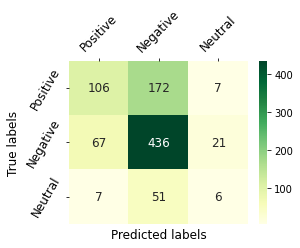

===  Confusion Matrix of Best Textual Model


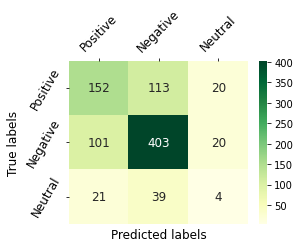

===  Confusion Matrix of Best Multimodal Model


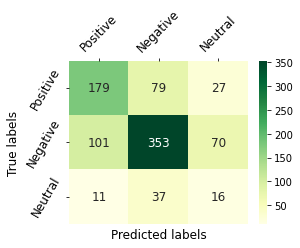

In [ ]:
for i,m in enumerate(model_names):
  plt.pause(0.2)
  con_mat(results['Actual'],results[model_names[i]],m)

##Qualitative Analysis

In [ ]:
## Image Display Function
def display_image(image_name):
  data = im.imread(memes_path+'3300 Memes/'+ image_name,0)
  plt.figure()
  plt.axis('off')
  plt.imshow(data)
  plt.pause(0.2)
  #plt.savefig(folder_path+'Results/'+f'{image_name}.jpg',bbox_inches ='tight')
  #


Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> সিনেমা দেখতে যাচ্ছি আরো ১৭ জনকে নিয়ে তুই যাবি নাকি?? ১৭ জন?? এতজন একসাথে কেন? সিনেমা পোস্টারে ওয়ার্নিং দেখলাম ১৮+ ছাড়া দেখা যাবে না, তাই একসাথে!! তোরেতো মিউজিয়ামে রাখা দরকার! এত বুদ্ধি অসাধারণ!!! 

Image === >
 15


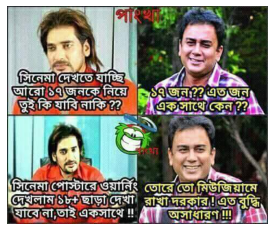

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> হেই রুবেল!জ্বি জলিল ভাই সামনেই "হ্যাপি" নিউ ইয়ার 

Image === >
 73


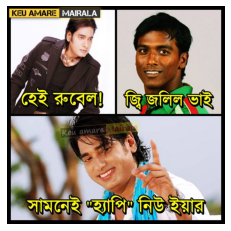

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> ৫টি ফুলের নাম বল বিউটিফুল, ওয়ান্ডারফুল, হাউজফুল, ইউজফুল,সুইমিংপুল হারামজাদা হারামজাদা না ম্যাম ওটা হার্মফুল! 

Image === >
 101


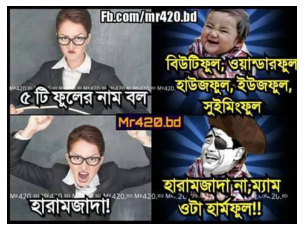

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> বাবা, মা সিরিয়াল কবে শেষ হবে? জানিনা বাবু,আমিও তোমার বয়সে আমার বাবকে এই প্রশ্নটা করেছিলাম  

Image === >
 116


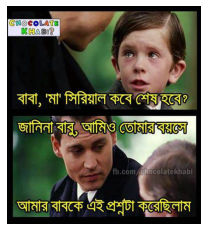

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> চলে গেছো তাতে কি   চকবাজার ট্রাজেডি   বিমান ছিনতাইয়ের চেষ্টা   বসুন্ধরায় বাসচাপায় বিশ্ববিদ্যালয় শিক্ষার্থী নিহত    নতুন একটা পেয়েছি   বনানীতে ভয়াবহ আগুন  

Image === >
 132


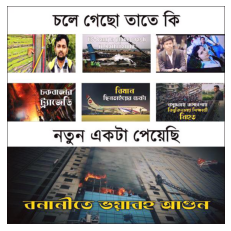

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> যখন ক্লাসের সবচেয়ে লম্বা ছেলেটাকে বোর্ড মুছতে ডাক দেওয়া হয়ঃ 

Image === >
 140


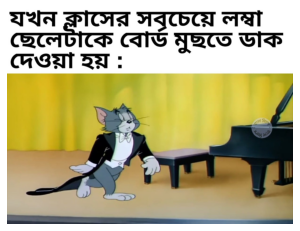

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> My english medium friend: What's the time, bro ?     Me : সোয়া একটা      Him : 

Image === >
 174


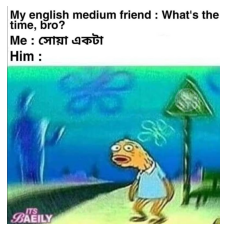

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> ভিডিও কলের সময় যখন বন্ধু স্ক্রিনশট উঠায়।   যখন আমার বন্ধু এইরকম থাকে      যখন আমি  এইরকম ভাবে থাকি    @Halal MeMes 

Image === >
 183


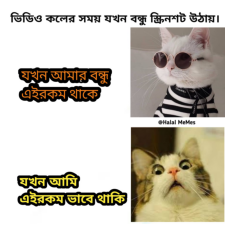

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> আমি যদি হুট করে মারা যায় তুমি কি করবে? আমিও মইরা যামু! তাই? এতো ভালোবাসো আমাকে? জ্বি না, তর পেছনে খরচ করার লাইগা এতো টাকা ধার করছি যে, মরা ছাড়া আমার আর উপায় নাই! 

Image === >
 185


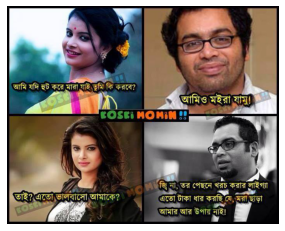

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> I LOVE YOU আমরা কি ২ জন ভালো বান্ধু হয়ে থাকতে পারি না? ফইন্ন 

Image === >
 194


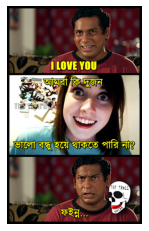

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> বিয়ের আগে বলো নাই কেনো যে তোমার রানী নামে আরেকটা বউ ছিলো? অনেক আগে বলছিলামতো... তোমাকে রানীর মত রাখবো!! 

Image === >
 208


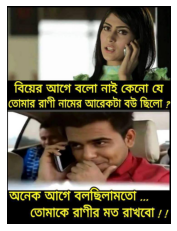

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> CSK না KKR চ্যাম্পিয়ন হবে 2019 IPL এ ?  RCB চ্যাম্পিয়ন হবে   লাডকি মে দম হ্যায় !  lol 

Image === >
 210


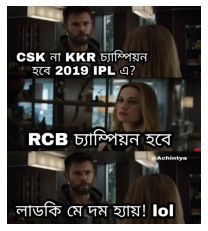

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> EVERYONE HAS THE FRIEND JE KHALI DEKHA HOILE "মামা তোর থেকে টাকা পাইতাম ! দিবি না ?" 

Image === >
 213


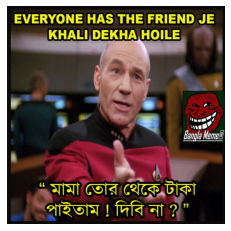

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> কাজিনদের সাথে বাইরে ঘুরতে যাওয়া  আমি   বাসার টিচার  

Image === >
 233


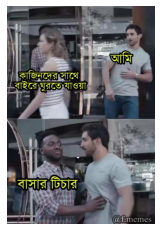

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> WITH আটা, ময়দা ও সুজি WITH কাদা, ময়লা এবং নোংরা পানি 

Image === >
 240


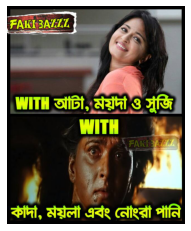

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> করোটিয়া   কইট্টা  

Image === >
 257


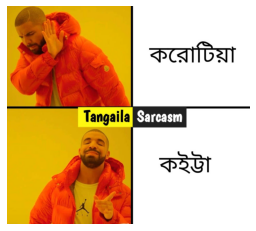

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পাশ নম্বর আমি সেমিস্টার ফাইনালের সময় 

Image === >
 258


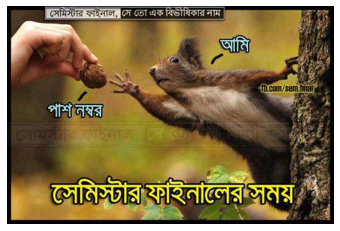

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> Sheikh Hasina looking at the next prime minister of Bangladesh  

Image === >
 266


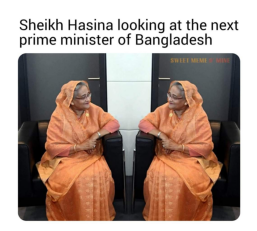

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> Patient Doctor কেমন আছেন? ভাল ok next 

Image === >
 280


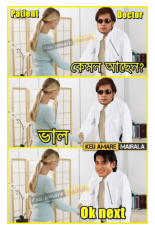

Visual Model ===> Negative 
 Textual Model ===> Positive 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> যখন তুমি মেহমানদের সাথে বসে আছ এবং তৃতীয়বার বিস্কুট নিচ্ছ    আম্মুর reaction - 

Image === >
 348


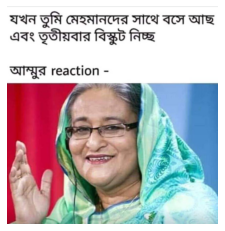

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> সেক্সপিয়ার বলেছিলেনঃ দুঃখ কখনো একা আসে না, সে দল বেধে আসে। পরীক্ষাও এক বিষয়ের উপর হয় না সব বিষয়ের উপর দল বেধে নেয়া হয়! 

Image === >
 369


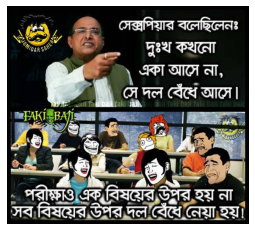

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> Mom packs me Biriyani for tiffin   বন্ধুবান্ধবঃ    আক্রমণ  

Image === >
 416


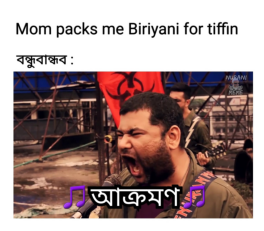

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> তুমি আমাকে কেন বলনি যে তোমার রানী নামে আগে একটা বউ আছে আমি তো আগেই বলেছি তোমাকে রানীর মত রাখবো 

Image === >
 423


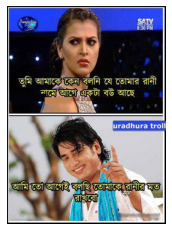

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> যখন তুুমি Fridge খুলে Ice Cream এর বক্স দেখতে পাও এবং বাটি-চামচ নিয়ে এসে বক্স খুলে আদা রসুন বাটা দেখ    "আমি চিৎকার করে কাদিতে, চাহিয়া করিতে পারিনি চিৎকার "  

Image === >
 431


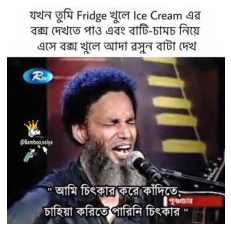

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পরিবারের বড় ছেলে পরিবারের ছোট ছেলে 

Image === >
 433


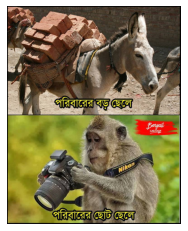

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===>  বেগম সাহেব     কাজের বুয়া    বাথরুম ধুয়ে  ঘর মুছে দে    আজকে মে দিবস  

Image === >
 444


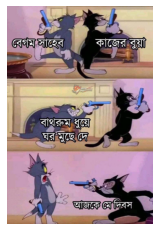

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> 3 idiots মুভি দেখে কি শিখলা? কিস করার সময় নাক মাঝখানে আসেনা! 

Image === >
 446


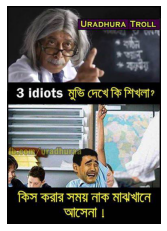

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> সেই মুহুুর্ত যখন একসাথে দুই তিনটা প্রেম করে আর ভ্যালেন্টাইন্স ডে তে সবার সাথে ডেট থাকে কিন্তু কার সাথে যাবে বুঝতে পারে না    একজনের সাথে গেলে অন্যজন কেটে যাবে    আজ ধরা পরেই যাবো ওয়াড়া  

Image === >
 468


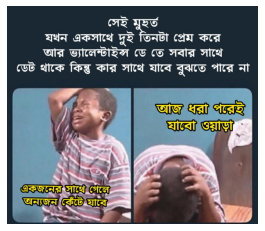

Visual Model ===> Positive 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> India vs England match exists     sarfaraz be like  আমরা ভারতকে বাবা ভাবলেও ভারত আমাদের ছেলে ভাবে না  

Image === >
 472


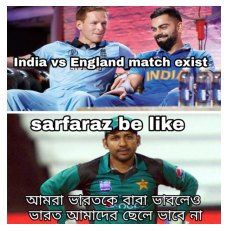

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> *১৪ ফেব্রুয়ারি রঙ্গিন ভালোবাসা দিবস *২১ ফেব্রুয়ারি সাদাকালো ভালোবাসা দিবস 

Image === >
 476


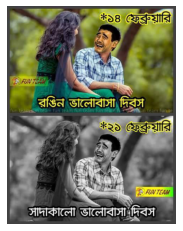

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> জানিস আজ একটা মেয়েকে প্রপোজ করেছি বলছিস কিরে তারপর কি হল? আলহামদুলিল্লাহ আমার আরেকটা বোন বেড়ে গেল 

Image === >
 480


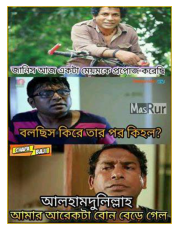

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> ক্যাপসুল মার্কেট   ক্যাপসুল মার্কেট  

Image === >
 499


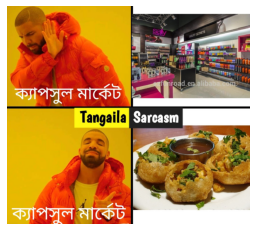

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> বার্সোলোনার যা কিছু মহান সৃষ্টি চির কল্যাণকর    অর্ধেক তার করিয়াছে মেসি অর্ধেক তার বাকি সবাই  

Image === >
 504


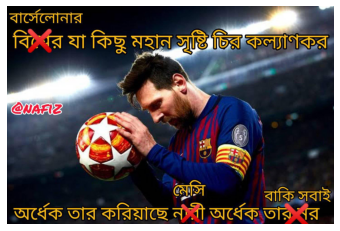

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> RCB team এর পর পর 6  ম্যাচ হারতে দেখে খিল্লি করা kkr fans right now   

Image === >
 525


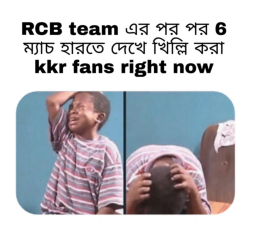

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> *ইদ এর ছুটির Assignment    *Me  

Image === >
 530


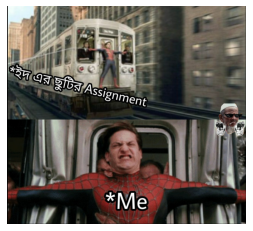

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> Me crossing the road with my father   Tong দোকানদারঃ   Kemon Achu MAMA  !  

Image === >
 542


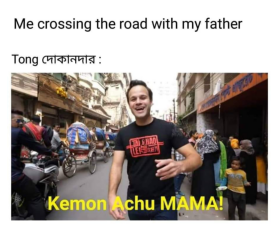

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> যখন আপনি একটা সিগারেট ধরান আর ঠিক সেই সময় পরিচিত কেউ আসার কারনে ফেলে দিতে হয়   

Image === >
 550


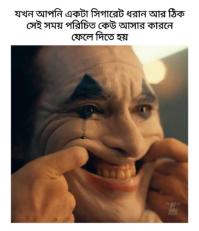

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> তুমি জান? আমার রূপের রহস্য কি?  ফেইসবুকে ফটোশপ আর বাইরে আটা ময়দা 

Image === >
 561


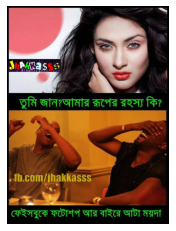

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> মধ্যরাতে ঘুম থেকে উঠে সেহেরি করা This is brilliant.     একবার সেহেরি করে ঘুমানো  But I like this  

Image === >
 581


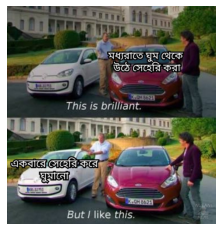

Visual Model ===> Negative 
 Textual Model ===> Positive 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> ট্রেনের টিকিট কিনসো ?? হুম  What did it cost?  আমার দুই রাতের ঘুম  

Image === >
 591


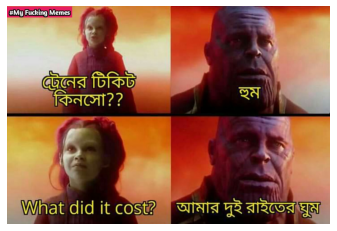

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> বড় ছেলে কে প্রাইভেট এ পড়ানো  All of their money   *parents   তোমাকে প্রাইভেট এ পড়ানোর মত সামর্থ্য আর ক্ষমতা আমাদের নাই  

Image === >
 592


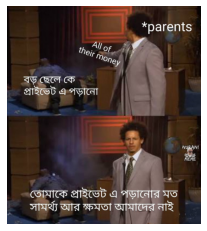

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> Dinesh Karthik to play-offs chances    Accha chalta hoon duaaon me yaad rakhna 

Image === >
 596


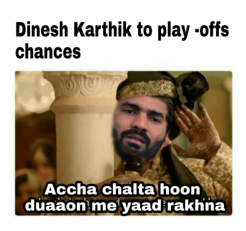

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> রিপোর্টে দেখছি আপনার পেটে অনেক চামচ! এতো চামচ ভিতরে গেল কিভাবে? আপনিইতো বলেছিলেন, ডেইলি দুই চামচ করে খেতে  

Image === >
 652


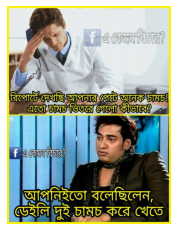

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> চলে এলাম  

Image === >
 669


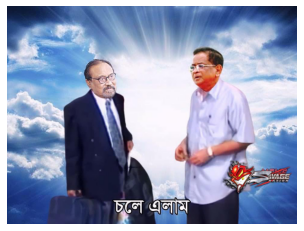

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> তাহলে ওই কথাই রইল  আমার BIRTHDAY উপলক্ষে   এই সপ্তাহ সকাল , দুপুর ও বিকাল তিনবার চপ খাওয়া বাধ্যতামুলক 

Image === >
 684


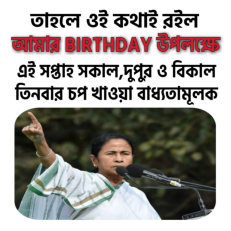

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পরীক্ষার হলে.. কি ব্যাপার! তোমরা লেখা বন্ধ করে গল্প করছো কেন? ম্যাম, প্রশ্ন লেখা আছে পলাশীর যুদ্ধ সম্পর্কে আলোচনা করো! তাই সবাই মিলে আলোচনা করছি। 

Image === >
 686


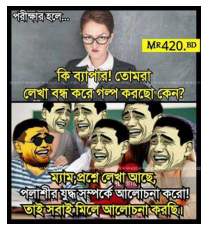

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> মাম্মাহ ইদের চাঁদ উঠছে  

Image === >
 688


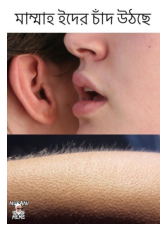

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পাশের বাড়ির ছেলেটা প্রতিদিন তার GF কে kiss করে যাই, তুমি করো না কেন? কিভাবে করবো আমিতো ওকে চিনিই না 

Image === >
 710


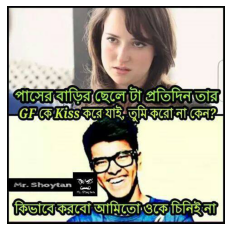

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> তেলাপোকা ভেবে খেজুর খেয়ে ফেলছি  

Image === >
 711


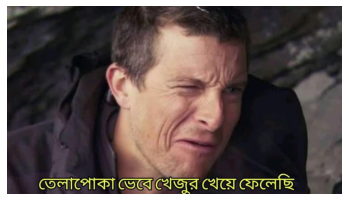

Visual Model ===> Negative 
 Textual Model ===> Negative 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> WHEN YOU SAY HI & THE OTHER PERSON SAYS ASSALAM WALAIKUM  

Image === >
 795


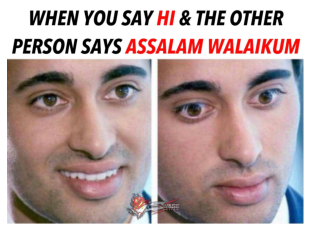

In [ ]:
## Visual and Textual (miss) , proposed (correct)
from matplotlib import image as im
for i in range(len(results)):
    if results['Best Textual Model'][i] != results['Best Multimodal Model'][i] and results['Best Visual Model'][i] != results['Best Multimodal Model'][i] and results['Best Multimodal Model'][i] ==results['Actual'][i]   :
        print('Visual Model ===>',results['Best Visual Model'][i],'\n',
            'Textual Model ===>',results['Best Textual Model'][i],'\n',
            'Proposed Model ===>',results['Best Multimodal Model'][i],'\n',
            'Actual Label ===>',results['Actual'][i],'\n',
            'captions ===>',results['Captions'][i],'\n')
        print('Image === >\n',i)
        
        display_image(results['image_name'][i])

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> ভিডিও কলের সময় যখন বন্ধু স্ক্রিনশট উঠায়।   যখন আমার বন্ধু এইরকম থাকে      যখন আমি  এইরকম ভাবে থাকি    @Halal MeMes 

Image === >
 183


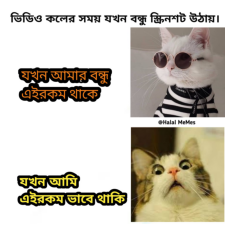

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> WITH আটা, ময়দা ও সুজি WITH কাদা, ময়লা এবং নোংরা পানি 

Image === >
 240


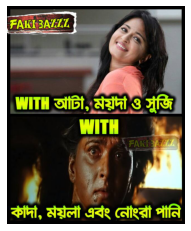

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পাশ নম্বর আমি সেমিস্টার ফাইনালের সময় 

Image === >
 258


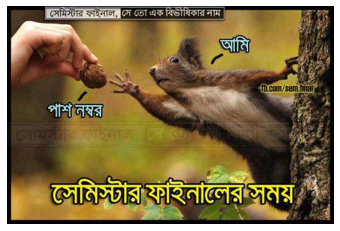

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> Sheikh Hasina looking at the next prime minister of Bangladesh  

Image === >
 266


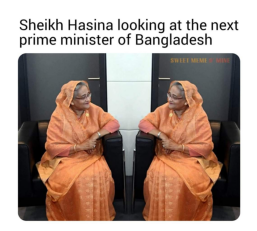

Visual Model ===> Negative 
 Textual Model ===> Positive 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> যখন তুমি মেহমানদের সাথে বসে আছ এবং তৃতীয়বার বিস্কুট নিচ্ছ    আম্মুর reaction - 

Image === >
 348


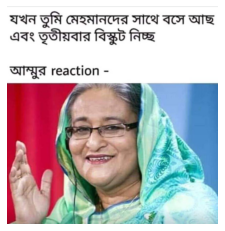

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> Mom packs me Biriyani for tiffin   বন্ধুবান্ধবঃ    আক্রমণ  

Image === >
 416


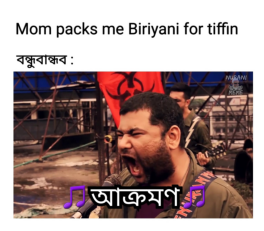

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> সেই মুহুুর্ত যখন একসাথে দুই তিনটা প্রেম করে আর ভ্যালেন্টাইন্স ডে তে সবার সাথে ডেট থাকে কিন্তু কার সাথে যাবে বুঝতে পারে না    একজনের সাথে গেলে অন্যজন কেটে যাবে    আজ ধরা পরেই যাবো ওয়াড়া  

Image === >
 468


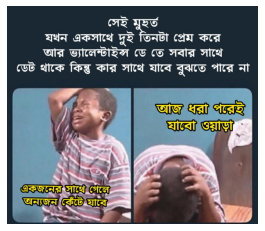

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> Me crossing the road with my father   Tong দোকানদারঃ   Kemon Achu MAMA  !  

Image === >
 542


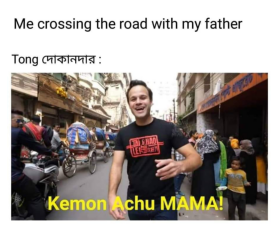

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> যখন আপনি একটা সিগারেট ধরান আর ঠিক সেই সময় পরিচিত কেউ আসার কারনে ফেলে দিতে হয়   

Image === >
 550


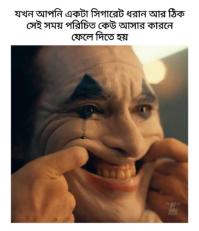

Visual Model ===> Negative 
 Textual Model ===> Positive 
 Proposed Model ===> Neutral 
 Actual Label ===> Neutral 
 captions ===> ট্রেনের টিকিট কিনসো ?? হুম  What did it cost?  আমার দুই রাতের ঘুম  

Image === >
 591


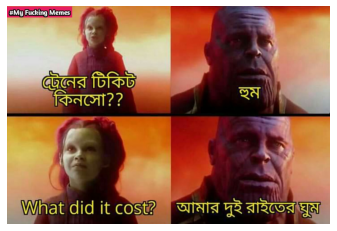

Visual Model ===> Neutral 
 Textual Model ===> Positive 
 Proposed Model ===> Negative 
 Actual Label ===> Negative 
 captions ===> বড় ছেলে কে প্রাইভেট এ পড়ানো  All of their money   *parents   তোমাকে প্রাইভেট এ পড়ানোর মত সামর্থ্য আর ক্ষমতা আমাদের নাই  

Image === >
 592


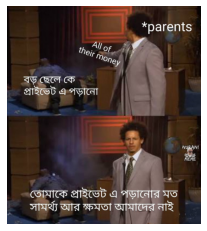

Visual Model ===> Negative 
 Textual Model ===> Neutral 
 Proposed Model ===> Positive 
 Actual Label ===> Positive 
 captions ===> পরীক্ষার হলে.. কি ব্যাপার! তোমরা লেখা বন্ধ করে গল্প করছো কেন? ম্যাম, প্রশ্ন লেখা আছে পলাশীর যুদ্ধ সম্পর্কে আলোচনা করো! তাই সবাই মিলে আলোচনা করছি। 

Image === >
 686


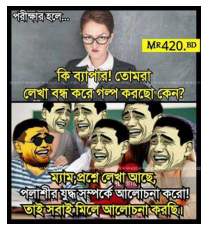

In [ ]:
## Visual and Textual (miss) , proposed (correct)
from matplotlib import image as im
for i in range(len(results)):
    if results['Best Textual Model'][i] != results['Best Multimodal Model'][i] and results['Best Visual Model'][i] != results['Best Textual Model'][i] and results['Best Visual Model'][i] != results['Best Multimodal Model'][i] and results['Best Multimodal Model'][i] ==results['Actual'][i]   :
        print('Visual Model ===>',results['Best Visual Model'][i],'\n',
            'Textual Model ===>',results['Best Textual Model'][i],'\n',
            'Proposed Model ===>',results['Best Multimodal Model'][i],'\n',
            'Actual Label ===>',results['Actual'][i],'\n',
            'captions ===>',results['Captions'][i],'\n')
        print('Image === >\n',i)
        
        display_image(results['image_name'][i])

# Visual Model with Soft Attention

In [ ]:
# xception = Xception(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

In [ ]:
from keras.layers import Layer
import keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
# Model
base_model = resnet
base_model.trainable = True
inner_layer = base_model.get_layer('conv5_block3_2_relu').output
reshape_layer = Reshape((inner_layer.shape[1]*inner_layer.shape[2], inner_layer.shape[3]))(inner_layer) # Reshape dimension
swap = Permute((2, 1))(reshape_layer) # Swap Axis
att_out = attention()(swap)
output = Dense(3, activation='softmax')(att_out)
# this is the model we will train
img_model = Model(inputs=base_model.input, outputs=output)

In [ ]:
base_model.summary()

In [ ]:
print(img_model.predict(train_image[[1]]))

In [ ]:
filepath = models_path + 'vis-attention.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )

In [ ]:
img_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Adam(), 
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
img_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=10, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = class_weights,
              callbacks = [checkpoint]
              )

Epoch 1/10
99/99 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.6521
Epoch 1: val_accuracy improved from -inf to 0.66000, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/vis-attention.h5
99/99 [==============================] - 27s 204ms/step - loss: 0.6047 - accuracy: 0.6521 - val_loss: 1.3620 - val_accuracy: 0.6600
Epoch 2/10
99/99 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.7727
Epoch 2: val_accuracy did not improve from 0.66000
99/99 [==============================] - 19s 194ms/step - loss: 0.4310 - accuracy: 0.7727 - val_loss: 1.4722 - val_accuracy: 0.5829
Epoch 3/10
99/99 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8121
Epoch 3: val_accuracy did not improve from 0.66000
99/99 [==============================] - 19s 190ms/step - loss: 0.3465 - accuracy: 0.8121 - val_loss: 1.3397 - val_accuracy: 0.6257
Epoch 4/10
99/99 [==========

In [ ]:
 # Prediction 
img_model.load_weights(models_path + "vis-attention.h5")  
# model = load_model(models_path+"vis-attention.h5")
pred = img_model.predict(test_image)
y_pred = np.argmax(pred,axis=-1)

28/28 [==============================] - 2s 53ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[139 139   7]
 [ 95 401  28]
 [ 12  47   5]]
              precision    recall  f1-score   support

    positive       0.57      0.49      0.52       285
    negative       0.68      0.77      0.72       524
     neutral       0.12      0.08      0.10        64

    accuracy                           0.62       873
   macro avg       0.46      0.44      0.45       873
weighted avg       0.60      0.62      0.61       873

Accuracy :  0.6242840778923253
Precison :  0.6036644978929812
Recall :  0.6242840778923253
F1 :  0.6112530490314765


# Visual Model with Multi-Head Attention

In [ ]:
# xception = Xception(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
# densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
from tensorflow import math, matmul, reshape, shape, transpose, cast, float32
from tensorflow.keras.layers import Dense, Layer
from keras.backend import softmax
 
# Implementing the Scaled-Dot Product Attention
class DotProductAttention(Layer):
    def __init__(self, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
 
    def call(self, queries, keys, values, d_k, mask=None):
        # Scoring the queries against the keys after transposing the latter, and scaling
        scores = matmul(queries, keys, transpose_b=True) / math.sqrt(cast(d_k, float32))
 
        # Apply mask to the attention scores
        if mask is not None:
            scores += -1e9 * mask
 
        # Computing the weights by a softmax operation
        weights = softmax(scores)
 
        # Computing the attention by a weighted sum of the value vectors
        return matmul(weights, values)
 
# Implementing the Multi-Head Attention
class MultiHeadAttention(Layer):
    def __init__(self, h, d_k, d_v, d_model, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.attention = DotProductAttention()  # Scaled dot product attention
        self.heads = h  # Number of attention heads to use
        self.d_k = d_k  # Dimensionality of the linearly projected queries and keys
        self.d_v = d_v  # Dimensionality of the linearly projected values
        self.d_model = d_model  # Dimensionality of the model
        self.W_q = Dense(d_k)  # Learned projection matrix for the queries
        self.W_k = Dense(d_k)  # Learned projection matrix for the keys
        self.W_v = Dense(d_v)  # Learned projection matrix for the values
        self.W_o = Dense(d_model)  # Learned projection matrix for the multi-head output
 
    def reshape_tensor(self, x, heads, flag):
        if flag:
            # Tensor shape after reshaping and transposing: (batch_size, heads, seq_length, -1)
            x = reshape(x, shape=(shape(x)[0], shape(x)[1], heads, -1))
            x = transpose(x, perm=(0, 2, 1, 3))
        else:
            # Reverting the reshaping and transposing operations: (batch_size, seq_length, d_k)
            x = transpose(x, perm=(0, 2, 1, 3))
            x = reshape(x, shape=(shape(x)[0], shape(x)[1], self.d_k))
        return x
 
    def call(self, queries, keys, values, mask=None):
        # Rearrange the queries to be able to compute all heads in parallel
        q_reshaped = self.reshape_tensor(self.W_q(queries), self.heads, True)
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)
 
        # Rearrange the keys to be able to compute all heads in parallel
        k_reshaped = self.reshape_tensor(self.W_k(keys), self.heads, True)
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)
 
        # Rearrange the values to be able to compute all heads in parallel
        v_reshaped = self.reshape_tensor(self.W_v(values), self.heads, True)
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)
 
        # Compute the multi-head attention output using the reshaped queries, keys and values
        o_reshaped = self.attention(q_reshaped, k_reshaped, v_reshaped, self.d_k, mask)
        # Resulting tensor shape: (batch_size, heads, input_seq_length, -1)
 
        # Rearrange back the output into concatenated form
        output = self.reshape_tensor(o_reshaped, self.heads, False)
        # Resulting tensor shape: (batch_size, input_seq_length, d_v)
 
        # Apply one final linear projection to the output to generate the multi-head attention
        # Resulting tensor shape: (batch_size, input_seq_length, d_model)
        return self.W_o(output)

In [ ]:
class PositionEmbeddingLayer(Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super(PositionEmbeddingLayer, self).__init__(**kwargs)
        # self.image_embedding_layer = self.features
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )

    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_image = self.inputs
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_image + embedded_indices

In [ ]:
# input_seq_length = 5  # Maximum length of the input sequence
# h = 8  # Number of self-attention heads
# d_k = 64  # Dimensionality of the linearly projected queries and keys
# d_v = 64  # Dimensionality of the linearly projected values
# d_model = 512  # Dimensionality of the model sub-layers' outputs
# batch_size = 2  # Batch size from the training process

# Visual Model Defination
base_model = resnet
base_model.trainable = True
inner_layer = base_model.get_layer('conv5_block3_2_relu').output  # (batch_size, 5, 5, 512)
reshape_layer = Reshape((inner_layer.shape[1]*inner_layer.shape[2], inner_layer.shape[3]))(inner_layer) # Reshape dimension
swap = Permute((2, 1))(reshape_layer) # Swap Axis  (batch_size, 512, 25)
# my_embedding_layer = PositionEmbeddingLayer(512, 25)
# embedded_layer_output = my_embedding_layer(swap)
queries = swap
keys = swap
values = swap
multihead_attention = MultiHeadAttention(h = 8, d_k = 64, d_v = 64, d_model=512)
att = multihead_attention(queries,keys,values)
flat = Flatten()(att)
# dense1 = Dense(20,activation = 'relu')(flat)
# pool = GlobalAveragePooling2D()(base_model.output)
output = Dense(3, activation='softmax')(flat)
# this is the model we will train
img_model = Model(inputs=base_model.input, outputs=output)

In [ ]:
base_model.summary()

In [ ]:
print(img_model.predict(train_image[[1]]).shape)

1/1 [==============================] - 1s 938ms/step
(1, 3)


In [ ]:
filepath = models_path + 'vis-self-attention.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )

In [ ]:
img_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Adam(), 
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
img_model.fit(x=train_image, 
              y=train_data['enc_label'],
              epochs=10, 
              batch_size =32,
              validation_split = 0.1, 
              verbose = 1,
              class_weight = class_weights,
              callbacks = [checkpoint])

Epoch 1/10
99/99 [==============================] - ETA: 0s - loss: 1.0084 - accuracy: 0.4763
Epoch 1: val_accuracy improved from -inf to 0.17429, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/vis-self-attention.h5
99/99 [==============================] - 29s 239ms/step - loss: 1.0084 - accuracy: 0.4763 - val_loss: 1.1994 - val_accuracy: 0.1743
Epoch 2/10
99/99 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.4824
Epoch 2: val_accuracy improved from 0.17429 to 0.21429, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/Online Memes/Dataset-3300/Multimodal Sentiment/Models/vis-self-attention.h5
99/99 [==============================] - 24s 243ms/step - loss: 0.9521 - accuracy: 0.4824 - val_loss: 1.4767 - val_accuracy: 0.2143
Epoch 3/10
99/99 [==============================] - ETA: 0s - loss: 0.9202 - accuracy: 0.4668
Epoch 3: val_accuracy did not improve from 0.21429
99/99 

In [ ]:
 # Prediction 
img_model.load_weights(models_path + "vis-self-attention.h5")  
# model = load_model(models_path+"vis-attention.h5")
pred = img_model.predict(test_image)
y_pred = np.argmax(pred,axis=-1)

28/28 [==============================] - 3s 63ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[135 150   0]
 [ 71 452   1]
 [  7  57   0]]
              precision    recall  f1-score   support

    positive       0.63      0.47      0.54       285
    negative       0.69      0.86      0.76       524
     neutral       0.00      0.00      0.00        64

    accuracy                           0.67       873
   macro avg       0.44      0.45      0.44       873
weighted avg       0.62      0.67      0.64       873

Accuracy :  0.6723940435280642
Precison :  0.6186013312133141
Recall :  0.6723940435280642
F1 :  0.6356670622265912


In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

94765736/94765736 [==============================] - 1s 0us/step
